## **Importing Libraries**

In [37]:
from sklearn.datasets import fetch_20newsgroups
# from nltk.tokenize import word_tokenize #Used to extract words from documents
# from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np

In [38]:
from nltk.stem import PorterStemmer        # module for stemming
import nltk
from scipy.cluster.hierarchy import linkage, dendrogram

import re

## **Reading 20 Newsgroups Dataset**

In [39]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [40]:
News_df = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [41]:
News_df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

## EDA

In [43]:
News_df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [44]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

In [45]:
print(News_df.data[0])



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [46]:
len(News_df.data)

2588

In [47]:
News_sample = News_df.data[0]

In [48]:
News_sample

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [49]:
# remove old style retweet text "RT"
News_sample2 = re.sub(r'^RT[\s]+', '', News_sample)

# remove hyperlinks
News_sample2 = re.sub(r'https?://[^\s\n\r]+', '', News_sample2)

# remove hashtags
# only removing the hash # sign from the word
News_sample2 = re.sub(r'#', '', News_sample2)

print(News_sample2)



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [51]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
News_sample2_tokens = tokenizer.tokenize(News_sample2)

print('Tokenized string:')
print(News_sample2_tokens)


Tokenized string:
['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']


In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/israa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords
import string

stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

In [57]:
print('\033[92m')
print(News_sample2_tokens)
print('\033[94m')

tweets_clean = []

for word in News_sample2_tokens: 
    if (word not in stopwords_english and  word not in string.punctuation):  
        tweets_clean.append(word)

print("After removing stop words and punctuation:")
print(tweets_clean)


['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']

After removing stop words and punctuation:
['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprog

In [58]:
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
News_sample2_tokens_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    News_sample2_tokens_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(News_sample2_tokens_stem)


['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprogrammed', 'funds', 'keep', 'nasp', 'alive', '1991', '2', 'efforts', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'shows', 'readers', 'sci.space', 'power', 'influence', 'allen']

stemmed words:
['think', 'larg', 'result', 'effort', 'peopl', 'read', 'group', 'write', 'letter', 'make', 'phone', 'call', 'follow', 'happen', '1', 'nasa', 'reprogram', 'fund', 'keep', 'nasp', 'aliv', '1991', '2', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twart', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavi', 'lobbi', 'may', 'mark', 'think', 'show', 'reader', 'sci.spac', 'power', 'influenc', 'allen']


## Visualization

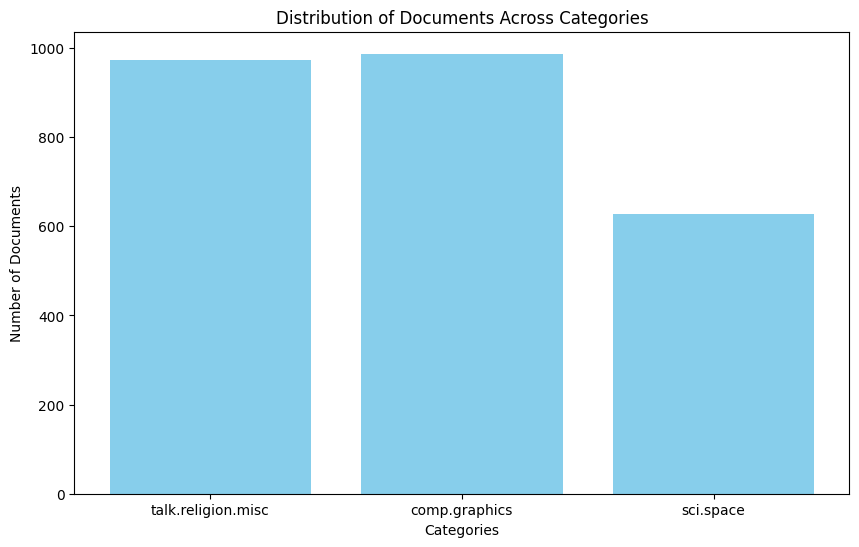

In [59]:
import matplotlib.pyplot as plt

# Count the number of documents in each category
category_counts = np.bincount(News_df.target)

# Plot the distribution of categories
plt.figure(figsize=(10, 6))
plt.bar(categories, category_counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents Across Categories')
plt.show()